In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from cmath import exp
from numpy import pi
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def eny1(tpara,kx,ky):
    x1=0.193
    y1=0.338
    x2=0.500
    y2=0.160
    t1 = tpara[0]; t2 = tpara[1]; t3 = tpara[2]; t4 = tpara[3]
    s=np.zeros((6,6), dtype=complex)
    s[0,1] = -1*t1*exp((0.+1.j)*(ky*(1-2*y1))); 
    s[1,2] = -1*t2*exp((0.+1.j)*(kx*(x2-x1)+ky*(y1-y2)));
    s[2,3] = -1*t2*exp((0.+1.j)*(kx*(x2-x1)+ky*(y2-y1)));
    s[3,4] = -1*t1*exp((0.+1.j)*(ky*(2*y1-1))); 
    s[4,5] = -1*t2*exp((0.+1.j)*(kx*(x1-x2)+ky*(y2-y1)));
    s[5,0] = -1*t2*exp((0.+1.j)*(kx*(x1-x2)+ky*(y1-y2)));
    s[0,4] = -1*t1*exp((0.+1.j)*(kx*(-2*x1))); 
    s[1,3] = -1*t1*exp((0.+1.j)*(kx*(-2*x1))); 
    s[2,5] = -1*t3*exp((0.+1.j)*(ky*(2*y2))); 
    s[0,3] = -1*t4*exp((0.+1.j)*(kx*(-2*x1)+ky*(1-2*y1))); 
    s[1,4] = -1*t4*exp((0.+1.j)*(kx*(-2*x1)+ky*(2*y1-1))); 
    #s[0,2] = -1*t3*exp((0.+1.j)*(kx*(x1-x2)+ky*(1-y1-y2)));
    #s[1,3] = -1*t3*exp((0.+1.j)*(kx*(2*x1-1))); 
    #s[2,4] = -1*t3*exp((0.+1.j)*(kx*(x1-x2)+ky*(y1+y2-1)));
    #s[3,5] = -1*t3*exp((0.+1.j)*(kx*(x2-x1)+ky*(y1+y2-1)));
    #s[4,0] = -1*t3*exp((0.+1.j)*(kx*(1-2*x1))); 
    #s[5,1] = -1*t3*exp((0.+1.j)*(kx*(x2-x1)+ky*(1-y1-y2)));
    #s[0,3] = -1*t4*exp((0.+1.j)*(kx*(2*x1)+ky*(1-2*y1))); 
    #s[1,4] = -1*t4*exp((0.+1.j)*(kx*(2*x1)+ky*(2*y1-1))); 
    s=np.mat(s)
    s=s+s.H
    E,_=np.linalg.eig(s) 
    t=E.real
    return sorted(t)
def engy1_f(K, t1, t2, t3, t4):
    nk=len(K)
    an=np.zeros(nk)
    tpara=[t1, t2, t3, t4]
    for i in range(0, nk-1):
        if i<nk/2:
            t=eny1(tpara,K[i,0]*pi,K[i,1]*pi)
            an[i]=t[2]
        else:
            t=eny1(tpara,K[i,0]*pi,K[i,1]*pi)
            an[i]=t[3]
    return an
def engy1_3(K, t1, t2, t3, t4):
    nk=len(K)
    an=np.zeros(nk)
    tpara=[t1, t2, t3, t4]
    for i in range(0, nk-1):
        t=eny1(tpara,K[i,0]*pi,K[i,1]*pi)
        an[i]=t[3]
    return an
def engy1_2(K, t1, t2, t3, t4):
    nk=len(K)
    an=np.zeros(nk)
    tpara=[t1, t2, t3, t4]
    for i in range(0, nk-1):
        t=eny1(tpara,K[i,0]*pi,K[i,1]*pi)
        an[i]=t[3]
    return an

In [ ]:
def eny2(tpara,kx,ky):
    x1=0.193
    y1=0.338
    x2=0.500
    y2=0.160
    t1 = tpara[0]; t2 = tpara[1]; t3 = tpara[2]; t4 = tpara[3]
    #t1 = tpara[0];t2=t1*1.455/1.402;t3=t1*1.455/1.439; t4 = tpara[3]
    s=np.zeros((6,6), dtype=complex)
    s[0,1] = -1*t1*exp((0.+1.j)*(ky*(1-2*y1))); #1.455
    s[1,2] = -1*t2*exp((0.+1.j)*(kx*(x2-x1)+ky*(y1-y2)));#1.402
    s[2,3] = -1*t2*exp((0.+1.j)*(kx*(x2-x1)+ky*(y2-y1)));
    s[3,4] = -1*t1*exp((0.+1.j)*(ky*(2*y1-1))); 
    s[4,5] = -1*t2*exp((0.+1.j)*(kx*(x1-x2)+ky*(y2-y1)));
    s[5,0] = -1*t2*exp((0.+1.j)*(kx*(x1-x2)+ky*(y1-y2)));
    s[0,4] = -1*t4*exp((0.+1.j)*(kx*(-2*x1)))#-t4*exp((0.+1.j)*(kx*(2*x2-2*x1))); #1.449
    s[1,3] = -1*t4*exp((0.+1.j)*(kx*(-2*x1)))#-t4*exp((0.+1.j)*(kx*(2*x2-2*x1))); 
    s[2,5] = -1*t3*exp((0.+1.j)*(ky*(2*y2))); #1.439
    #s[0,3] = -1*t4*exp((0.+1.j)*(kx*(-2*x1)+ky*(1-2*y1))); #2.053
    #s[1,4] = -1*t4*exp((0.+1.j)*(kx*(-2*x1)+ky*(2*y1-1))); 
    #s[0,2] = -1*t4*exp((0.+1.j)*(kx*(x2-x1)+ky*(1-y2-y1)));#1.402
    #s[2,4] = -1*t4*exp((0.+1.j)*(kx*(x2-x1)+ky*(y2+y1-1)));
    #s[1,5] = -1*t4*exp((0.+1.j)*(kx*(x2-x1)+ky*(y2+y1-1)));#1.402
    #s[3,5] = -1*t4*exp((0.+1.j)*(kx*(x1-x2)+ky*(y2+y1-1)));
    s=np.mat(s)
    s=s+s.H
    E,_=np.linalg.eig(s) 
    t=E.real
    return sorted(t)
def engy2_2(K, t1, t2, t3, t4):
    nk=len(K)
    an=np.zeros(nk)
    tpara=[t1, t2, t3, t4]
    for i in range(0, nk-1):
        t=eny2(tpara,K[i,0]*pi,K[i,1]*pi)
        an[i]=t[2]
    return an
def engy2_3(K, t1, t2, t3, t4):
    nk=len(K)
    an=np.zeros(nk)
    tpara=[t1, t2, t3, t4]
    for i in range(0, nk-1):
        t=eny2(tpara,K[i,0]*pi,K[i,1]*pi)
        an[i]=t[3]
    return an
def engy2_f(K, t1, t2, t3, t4):
    nk=len(K)
    an=np.zeros(nk)
    tpara=[t1, t2, t3, t4]
    for i in range(0, nk-1):
        if i<nk/2:
            t=eny2(tpara,K[i,0]*pi,K[i,1]*pi)
            an[i]=t[2]
        else:
            t=eny2(tpara,K[i,0]*pi,K[i,1]*pi)
            an[i]=t[3]
    return an

In [ ]:
def eny8(tpara,kx,ky):
    x1=0.193
    y1=0.338
    x2=0.500
    y2=0.160
    t1 = tpara[0]; t2 = tpara[1]; t3 = tpara[2]; t4 = tpara[3];
    t5 = tpara[4]; t6 = tpara[5]; t7 = tpara[6]; t8 = tpara[7]
    #t1 = tpara[0];t2=t1*1.455/1.402;t3=t1*1.455/1.439; t4 = tpara[3]
    s=np.zeros((6,6), dtype=complex)
    s[0,1] = -1*(t1)*exp((0.+1.j)*(ky*(1-2*y1))); #t1=1.455
    s[1,2] = -1*(t2)*exp((0.+1.j)*(kx*(x2-x1)+ky*(y1-y2)));#t2=1.402
    s[2,3] = -1*(t2)*exp((0.+1.j)*(kx*(x2-x1)+ky*(y2-y1)));
    s[3,4] = -1*(t1)*exp((0.+1.j)*(ky*(2*y1-1))); 
    s[4,5] = -1*(t2)*exp((0.+1.j)*(kx*(x1-x2)+ky*(y2-y1)));
    s[5,0] = -1*(t2)*exp((0.+1.j)*(kx*(x1-x2)+ky*(y1-y2)));
    s[0,4] = -1*(t4)*exp((0.+1.j)*(kx*(-2*x1)))-t6*exp((0.+1.j)*(kx*(2*x2-2*x1))); #t4=1.449,
    s[1,3] = -1*(t4)*exp((0.+1.j)*(kx*(-2*x1)))-t6*exp((0.+1.j)*(kx*(2*x2-2*x1))); #t6=2.298,
    s[2,5] = -1*(t3)*exp((0.+1.j)*(ky*(2*y2))); #t3=1.439
    s[0,3] = -1*(t5)*exp((0.+1.j)*(kx*(-2*x1)+ky*(1-2*y1)))-t8*exp((0.+1.j)*(kx*(2*x2-2*x1)+ky*(1-2*y1))); #t5=2.053
    s[1,4] = -1*(t5)*exp((0.+1.j)*(kx*(-2*x1)+ky*(2*y1-1)))-t8*exp((0.+1.j)*(kx*(2*x1-2*x2)+ky*(2*y1-1))); #t8=2.720
    s[0,2] = -1*t7*exp((0.+1.j)*(kx*(x2-x1)+ky*(1-y2-y1)));#2.534
    s[2,4] = -1*t7*exp((0.+1.j)*(kx*(x2-x1)+ky*(y2+y1-1)));
    s[1,5] = -1*t7*exp((0.+1.j)*(kx*(x2-x1)+ky*(y2+y1-1)));#2.534
    s[3,5] = -1*t7*exp((0.+1.j)*(kx*(x1-x2)+ky*(y2+y1-1)));
    s=np.mat(s)
    s=s+s.H
    E,_=np.linalg.eig(s) 
    t=E.real
    return sorted(t)

def engy8_2(K, t1, t2, t3, t4, t5, t6, t7, t8):
    nk=len(K)
    an=np.zeros(nk)
    tpara=[t1, t2, t3, t4, t5, t6, t7, t8]
    for i in range(0, nk-1):
        t=eny8(tpara,K[i,0]*pi,K[i,1]*pi)
        an[i]=t[2]
    return an
def engy8_3(K, t1, t2, t3, t4, t5, t6, t7, t8):
    nk=len(K)
    an=np.zeros(nk)
    tpara=[t1, t2, t3, t4, t5, t6, t7, t8]
    for i in range(0, nk-1):
        t=eny8(tpara,K[i,0]*pi,K[i,1]*pi)
        an[i]=t[3]
    return an
def engy8_f(K, t1, t2, t3, t4, t5, t6, t7, t8):
    nk=len(K)
    an=np.zeros(nk)
    tpara=[t1, t1, t2, t3, t4, t5, t6, t7, t8]
    for i in range(0, nk-1):
        if i<nk/2:
            t=eny8(tpara,K[i,0]*pi,K[i,1]*pi)
            an[i]=t[2]
        else:
            t=eny8(tpara,K[i,0]*pi,K[i,1]*pi)
            an[i]=t[3]
    return an

In [14]:
def eny9(tpara,kx,ky):
    x1=0.193
    y1=0.338
    x2=0.500
    y2=0.160
    t1 = tpara[0]; t2 = tpara[1]; t3 = tpara[2]; t4 = tpara[3];
    t5 = tpara[4]; t6 = tpara[5]; t7 = tpara[6]; t8 = tpara[7]
    t9 = tpara[8]; t10 = tpara[9]; t11 = tpara[10]; t12 = tpara[11]
    #t1 = tpara[0];t2=t1*1.455/1.402;t3=t1*1.455/1.439; t4 = t1*1.455/1.449
    s=np.zeros((6,6), dtype=complex)
    s[0,1] = -1*(t1)*exp((0.+1.j)*(ky*(1-2*y1)))-t12*exp((0.+1.j)*(ky*(-2*y2-2*y1))); #t1=1.455
    s[1,2] = -1*(t2)*exp((0.+1.j)*(kx*(x2-x1)+ky*(y1-y2)))-t10*exp((0.+1.j)*(kx*(-x2-x1)+ky*(y1-y2)));#t2=1.402
    s[2,3] = -1*(t2)*exp((0.+1.j)*(kx*(x2-x1)+ky*(y2-y1)))-t10*exp((0.+1.j)*(kx*(-x2-x1)+ky*(y2-y1)));
    s[3,4] = -1*(t1)*exp((0.+1.j)*(ky*(2*y1-1)))-t12*exp((0.+1.j)*(ky*(2*y2+2*y1))); #t12=3.049
    s[4,5] = -1*(t2)*exp((0.+1.j)*(kx*(x1-x2)+ky*(y2-y1)))-t10*exp((0.+1.j)*(kx*(x1+x2)+ky*(y2-y1)));
    s[5,0] = -1*(t2)*exp((0.+1.j)*(kx*(x1-x2)+ky*(y1-y2)))-t10*exp((0.+1.j)*(kx*(x1+x2)+ky*(y1-y2)));#t10=2.720
    s[0,4] = -1*(t4)*exp((0.+1.j)*(kx*(-2*x1)))-t6*exp((0.+1.j)*(kx*(2*x2-2*x1))); #t4=1.449,
    s[1,3] = -1*(t4)*exp((0.+1.j)*(kx*(-2*x1)))-t6*exp((0.+1.j)*(kx*(2*x2-2*x1))); #t6=2.298,
    s[2,5] = -1*(t3)*exp((0.+1.j)*(ky*(2*y2)))-(t11)*exp((0.+1.j)*(ky*(2*y2-1))); #t3=1.439,t11=3.061
    s[0,3] = -1*(t5)*exp((0.+1.j)*(kx*(-2*x1)+ky*(1-2*y1)))-t9*exp((0.+1.j)*(kx*(2*x2-2*x1)+ky*(1-2*y1))); #t5=2.053
    s[1,4] = -1*(t5)*exp((0.+1.j)*(kx*(-2*x1)+ky*(2*y1-1)))-t9*exp((0.+1.j)*(kx*(2*x1-2*x2)+ky*(2*y1-1))); #t9=2.720
    s[0,2] = -1*t7*exp((0.+1.j)*(kx*(x2-x1)+ky*(1-y2-y1)))-t8*exp((0.+1.j)*(kx*(x2-x1)+ky*(y2+y1-1)));#t7=2.534
    s[2,4] = -1*t7*exp((0.+1.j)*(kx*(x2-x1)+ky*(y2+y1-1)))-t8*exp((0.+1.j)*(kx*(x2-x1)+ky*(1-y2-y1)));
    s[1,5] = -1*t7*exp((0.+1.j)*(kx*(x2-x1)+ky*(y2+y1-1)))-t8*exp((0.+1.j)*(kx*(x2-x1)+ky*(1-y2-y1)));#t8=2.521
    s[3,5] = -1*t7*exp((0.+1.j)*(kx*(x1-x2)+ky*(y2+y1-1)))-t8*exp((0.+1.j)*(kx*(x2-x1)+ky*(1-y2-y1)));
    s=np.mat(s)
    s=s+s.H
    E,_=np.linalg.eig(s)
    t=E.real
    return sorted(t)

def engy9_2(K, t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12):
    nk=len(K)
    an=np.zeros(nk)
    tpara=[t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12]
    for i in range(0, nk-1):
        t=eny9(tpara,K[i,0]*pi,K[i,1]*pi)
        an[i]=t[2]
    return an
def engy9_3(K, t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12):
    nk=len(K)
    an=np.zeros(nk)
    tpara=[t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12]
    for i in range(0, nk-1):
        t=eny9(tpara,K[i,0]*pi,K[i,1]*pi)
        an[i]=t[3]
    return an
def engy9_f(K, t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12):
    nk=len(K)
    an=np.zeros(nk)
    tpara=[t1, t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12]
    for i in range(0, nk-1):
        if i<nk/2:
            t=eny9(tpara,K[i,0]*pi,K[i,1]*pi)
            an[i]=t[2]
        else:
            t=eny9(tpara,K[i,0]*pi,K[i,1]*pi)
            an[i]=t[3]
    return an

In [3]:
data1=np.loadtxt("./BAND.B12.grd", delimiter=None)
data2=np.loadtxt("./BAND.B13.grd", delimiter=None)
kx=np.loadtxt("./KX.grd", delimiter=None)
ky=np.loadtxt("./KY.grd", delimiter=None)

In [5]:
kxy=np.vstack((kx.flatten(),ky.flatten())).transpose()
kxy=np.vstack((kxy,kxy))


In [ ]:
data=np.hstack((data1.flatten(),data2.flatten()))
kxy=np.vstack((kx.flatten(),ky.flatten())).transpose()
kxy=np.vstack((kxy,kxy))
popt, pcov = curve_fit(engy1_f, kxy, data, maxfev=500000, p0=(2.9,2.9,2.9,2.9))
perr = np.sqrt(np.diag(pcov))
print(popt)
print(perr)

In [ ]:
popt, pcov = curve_fit(engy4, np.vstack((kx.flatten(),ky.flatten())).transpose(), data2.flatten(), maxfev=500000, p0=(2.9,2.9,2.9,2.8))
perr = np.sqrt(np.diag(pcov))
print(popt)
print(perr)

In [ ]:
data=np.hstack((data1.flatten(),data2.flatten()))
kxy=np.vstack((kx.flatten(),ky.flatten())).transpose()
kxy=np.vstack((kxy,kxy))
popt, pcov = curve_fit(engy3, kxy, data, maxfev=500000, p0=(2.9,2.9,2.9,2.9))
perr = np.sqrt(np.diag(pcov))
print(popt)
print(perr)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure() # 创建一个画布figure，然后在这个画布上加各种元素。
ax = Axes3D(fig) # 将画布作用于 Axes3D 对象上。
ax.plot_surface(kx, ky, data1, color='b') 
#ax.scatter(kx, ky, data2) # 画出(xs1,ys1,zs1)的散点图。
#ax.scatter(kx, ky, data1) # 画出(xs1,ys1,zs1)的散点图。
plt.show()

In [ ]:
kxy=np.vstack((kx.flatten(),ky.flatten())).transpose()
data_fit=engy5(kxy, 2.87443588, 3.06050229, 2.66715071, 3.03441115)
fig = plt.figure() # 创建一个画布figure，然后在这个画布上加各种元素。
ax = Axes3D(fig) # 将画布作用于 Axes3D 对象上。
ax.plot_surface(kx, ky, data_fit.reshape(np.shape(data1)), color='b') 
#ax.scatter(kx, ky, data2) # 画出(xs1,ys1,zs1)的散点图。
#ax.scatter(kx, ky, data1) # 画出(xs1,ys1,zs1)的散点图。
plt.show()

In [ ]:
def engy8(K, t1, t2, t3, t4):
    nk=len(K)
    an=np.zeros(nk)
    tpara=[t1, t2, t3, t4]
    for i in range(0, nk-1):
        t=eny2(tpara,K[i,0]*pi,K[i,1]*pi)
        an[i]=t[2]
    return an
def engy9(K, t1, t2, t3, t4):
    nk=len(K)
    an=np.zeros(nk)
    tpara=[t1, t2, t3, t4]
    for i in range(0, nk-1):
        if i<nk/2:
            t=eny2(tpara,K[i,0]*pi,K[i,1]*pi)
            an[i]=t[2]
        else:
            t=eny2(tpara,K[i,0]*pi,K[i,1]*pi)
            an[i]=t[3]
    return an

kxy=np.vstack((kx.flatten(),ky.flatten())).transpose()
#data_fit=engy5(kxy, 2.87443588, 3.06050229, 2.66715071, 3.03441115)
data_fit=engy8(kxy, 3.24902305+1.09384801j, 3.41401223+1.12356647j, 3.44903729, 3.134769)
fig = plt.figure() # 创建一个画布figure，然后在这个画布上加各种元素。
ax = Axes3D(fig) # 将画布作用于 Axes3D 对象上。
ax.plot_surface(kx, ky, data_fit.reshape(np.shape(data1)), color='b') 
#ax.scatter(kx, ky, data2) # 画出(xs1,ys1,zs1)的散点图。
#ax.scatter(kx, ky, data1) # 画出(xs1,ys1,zs1)的散点图。
plt.show()

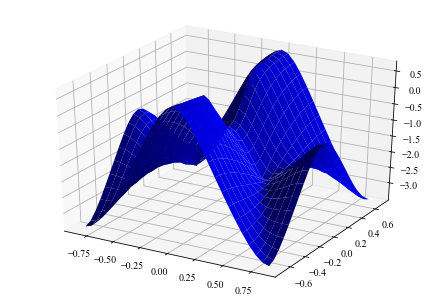

In [12]:

fig = plt.figure() # 创建一个画布figure，然后在这个画布上加各种元素。
ax = Axes3D(fig) # 将画布作用于 Axes3D 对象上。
ax.plot_surface(kx, ky, data1, color='b') 
#ax.scatter(kx, ky, data2) # 画出(xs1,ys1,zs1)的散点图。
#ax.scatter(kx, ky, data1) # 画出(xs1,ys1,zs1)的散点图。
plt.show()

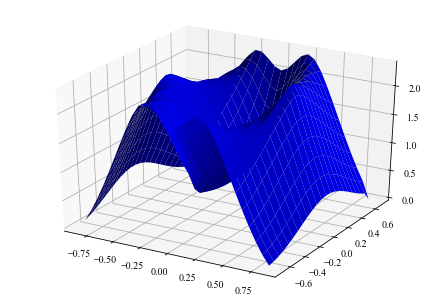

In [15]:
kxy=np.vstack((kx.flatten(),ky.flatten())).transpose()
#data_fit=engy5(kxy, 2.87443588, 3.06050229, 2.66715071, 3.03441115)
data_fit=engy9_3(kxy,2.2513004,  3.18340131,  2.94907984,  2.521327,    0.08634244,  0.14394721, -0.21099235,  0.21867582,  0.18220586, -0.2747581,   1.09864612,  0.13913331 )
fig = plt.figure() # 创建一个画布figure，然后在这个画布上加各种元素。
ax = Axes3D(fig) # 将画布作用于 Axes3D 对象上。
ax.plot_surface(kx, ky, data_fit.reshape(np.shape(data1)), color='b') 
#ax.scatter(kx, ky, data2) # 画出(xs1,ys1,zs1)的散点图。
#ax.scatter(kx, ky, data1) # 画出(xs1,ys1,zs1)的散点图。
plt.show()

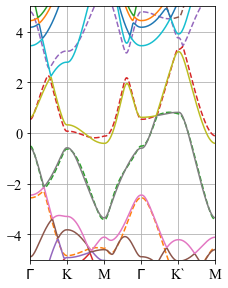

In [10]:
def findfit():    
    data1=np.loadtxt("./BAND.B12.grd", delimiter=None)
    data2=np.loadtxt("./BAND.B13.grd", delimiter=None)
    kx=np.loadtxt("./KX.grd", delimiter=None)
    ky=np.loadtxt("./KY.grd", delimiter=None)
    data=np.hstack((data1.flatten(),data2.flatten()))
    kxy=np.vstack((kx.flatten(),ky.flatten())).transpose()
    kxy=np.vstack((kxy,kxy))
    popt, pcov = curve_fit(engy9_f, kxy, data, maxfev=500000, p0=(2.7,3.1,2.9,2.7,1.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2))
    perr = np.sqrt(np.diag(pcov))
    print(popt)
    print(perr)
    return popt,perr

def energy_bond(data):
    tfit=data
    hw=[]
    for i in range(250):
        if i<50:
            kx = np.pi*(i)/49
            ky = 0
        elif i<100:
            kx = np.pi; ky = np.pi*(i-50)/49
        elif i<150:
            kx = np.pi*(149-i)/49; ky = kx
        elif i<200:
            ky = np.pi*(i-150)/49; kx = 0
        else:
            kx = np.pi*(i-200)/49; ky = np.pi
        hw.append(eny9(tfit,kx,ky))
    x2 = np.linspace(1, 250, 250)   
    return x2,hw

def fig(i):
    #data=np.loadtxt("./wannier90_band.dat")
    #x2=data[0:497,0]/4.1632844*250
    #hw=np.reshape(data[:, 1], (497,-1), order='F')+2.849335
    #x2 = np.linspace(1, 250, 497)
    #data,perr=findfit()
    #data=[1.97837436,  3.73860353,  5.66050944, -0.45672913]
    data=[2.2513004,  3.18340131,  2.94907984,  2.521327,    0.08634244,  0.14394721, -0.21099235,  0.21867582,  0.18220586, -0.2747581,   1.09864612,  0.13913331]     
    x2,hw=energy_bond(data)
    data=np.loadtxt("./BAND-%.2d.dat" % i, delimiter=None)
    x = np.linspace(1, 250, 250)
    real=np.reshape(data[:, 1], (250,-1), order='F')  
    for i1 in range(np.shape(real)[1]):
        if i1%2==1:
            real[:, i1]=real[::-1, i1]
    plt.rc('font',family='Times New Roman')
    plt.figure(figsize=(3,4))
    plt.plot(x2, hw, linestyle='--')#-3.65-0.59
    plt.plot(x,real)
    plt.axis([1,250,-5,5]) 
    plt.xticks([0, 50, 100, 150, 200,250],['$\Gamma$','K','M','$\Gamma$','K`','M'],fontsize='x-large')
    plt.yticks([-4, -2, 0, 2, 4],fontsize='x-large')
    plt.grid(axis="x")    
    plt.grid(axis="y")    
    plt.margins(0, 0)
    plt.subplots_adjust(top=0.98, bottom=0.10, right=0.98, left=0.12, hspace=0.05, wspace=0.05)
    plt.savefig('./'+str('%.2d' % i)+'.jpg',dpi=600,format='jpg')
    plt.show()
fig(11)